In [ ]:
#Download surprise lib
import sys
!{sys.executable} -m pip install scikit-surprise
import pandas as pd
import numpy as np
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBasic
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 2.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633987 sha256=5ce920c8b7b163c18fe61f58fef65713edcaae94def7a4ac773075f12ca0a210
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
#Read the dataset
ratings_df = pd.read_csv('/content/drive/MyDrive/ratings_small.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
ratings_df.shape

(100004, 4)

In [ ]:
# More info about dataset
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [ ]:
#Check for null values
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
#Check for unique values
ratings_df.nunique()

userId         671
movieId       9066
rating          10
timestamp    78141
dtype: int64

In [ ]:
reader = Reader(line_format='user item rating timestamp',sep=',',skip_lines=1, rating_scale=(1, 5))
ratings_data = Dataset.load_from_file("/content/drive/MyDrive/ratings_small.csv",reader)

In [ ]:
svd_algo = SVD(biased = False)

In [ ]:
PMF_result = cross_validate(svd_algo, ratings_data, measures=['RMSE', 'MAE'],cv=5,verbose = True)
print("PMF Results -",PMF_result)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0153  1.0074  1.0023  1.0083  1.0201  1.0107  0.0063  
MAE (testset)     0.7844  0.7809  0.7742  0.7780  0.7861  0.7807  0.0043  
Fit time          6.93    5.85    7.52    5.31    5.69    6.26    0.83    
Test time         0.20    0.49    0.41    0.15    0.22    0.29    0.13    
PMF Results - {'test_rmse': array([1.01531621, 1.00741638, 1.00234901, 1.00832497, 1.02011541]), 'test_mae': array([0.78444591, 0.7808536 , 0.77416404, 0.77804474, 0.78614453]), 'fit_time': (6.928886890411377, 5.851327896118164, 7.523586273193359, 5.306934595108032, 5.69171667098999), 'test_time': (0.20046401023864746, 0.4934217929840088, 0.41045308113098145, 0.15062284469604492, 0.21505451202392578)}


In [ ]:
PMF_results_data = pd.DataFrame.from_dict(PMF_result)
print("Average PMF MAE value", PMF_results_data['test_mae'].mean())
print("Average PMF RMSE value", PMF_results_data['test_rmse'].mean())


Average PMF MAE value 0.7807305640557335
Average PMF RMSE value 1.0107043979012698


In [ ]:
#Using KNNbasis
'''Setting user_based to true for user-based collabrative filtering'''
sim_options = {'user_based': True }
user_based = KNNBasic(sim_options=sim_options)

In [ ]:
user_based_results = cross_validate(user_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('user based results -', user_based_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9659  0.9677  0.9678  0.9657  0.9725  0.9679  0.0025  
MAE (testset)     0.7433  0.7473  0.7424  0.7443  0.7445  0.7443  0.0016  
Fit time          0.24    0.16    0.15    0.21    0.18    0.19    0.03    
Test time         1.88    1.93    1.56    2.02    1.85    1.85    0.16    
user based results - {'test_rmse': array([0.96594545, 0.96765415, 0.96784194, 0.96567126, 0.97250707]), 'test_mae': array([0.74328956, 0.74725905, 0.74244914, 0.74425447, 0.74446012]), 'fit_time': (0.2

In [ ]:
user_based_results_data = pd.DataFrame.from_dict(user_based_results)
print("Average User Based MAE value", user_based_results_data['test_mae'].mean())
print("Average User Based RMSE value", user_based_results_data['test_rmse'].mean())

Average User Based MAE value 0.7443424685170754
Average User Based RMSE value 0.9679239759257554


In [ ]:
#Using KNNbasis
'''Setting user_based to false for item-based collabrative filtering'''
sim_options = {'user_based': False }
item_based = KNNBasic(sim_options=sim_options)

In [ ]:
item_based_results = cross_validate(item_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('item based results -', item_based_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9344  0.9385  0.9354  0.9327  0.9332  0.9348  0.0021  
MAE (testset)     0.7206  0.7235  0.7215  0.7196  0.7219  0.7214  0.0013  
Fit time          5.02    4.50    5.37    6.48    4.90    5.25    0.67    
Test time         7.82    7.49    12.40   8.01    7.70    8.69    1.86    
item based results - {'test_rmse': array([0.93436647, 0.93851175, 0.9354357 , 0.93266859, 0.93315044]), 'test_mae': array([0.72063833, 0.72349712, 0.7214543 , 0.71956862, 0.72190978]), 'fit_time': (5.0

In [ ]:
item_based_results_data = pd.DataFrame.from_dict(item_based_results)
print("Average Item Based MAE value", item_based_results_data['test_mae'].mean())
print("Average Item Based RMSE value", item_based_results_data['test_rmse'].mean())

Average Item Based MAE value 0.7214136316829658
Average Item Based RMSE value 0.9348265897863905


In [ ]:
#setting parameters for Cosine's impact on User Based
'''Setting user_based to true for user-based collabrative filtering and name to cosine'''
sim_options = {'name':'cosine','user_based': True }
cosine_user_based = KNNBasic(sim_options=sim_options)

In [ ]:
cosine_ub_results = cross_validate(cosine_user_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Cosine on User Based -', cosine_ub_results)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9987  0.9943  0.9933  0.9912  0.9905  0.9936  0.0029  
MAE (testset)     0.7716  0.7665  0.7695  0.7666  0.7645  0.7678  0.0025  
Fit time          0.40    0.45    0.74    0.40    0.41    0.48    0.13    
Test time         1.89    2.01    3.99    1.89    1.73    2.30    0.85    
Impact of Cosine on User Based - {'test_rmse': array([0.99870891, 0.99430726, 0.99327366, 0.99117998, 0.99046725]), 'test_mae': array([0.77160425, 0.76651641, 0.76954947, 0.76663342, 0.7

In [ ]:
#setting parameters for MSD's impact on User Based
'''Setting user_based to true for user-based collabrative filtering and name to msd'''
sim_options = {'name':'msd','user_based': True }
msd_user_based = KNNBasic(sim_options=sim_options)

In [ ]:
msd_ub_results = cross_validate(msd_user_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of MSD on User Based -', msd_ub_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9632  0.9776  0.9691  0.9715  0.9605  0.9684  0.0061  
MAE (testset)     0.7412  0.7531  0.7438  0.7451  0.7389  0.7444  0.0049  
Fit time          0.35    0.29    0.29    0.29    0.54    0.35    0.10    
Test time         2.68    3.21    2.81    4.29    4.06    3.41    0.65    
Impact of MSD on User Based - {'test_rmse': array([0.96323027, 0.97761807, 0.96909601, 0.97148945, 0.96053851]), 'test_mae': array([0.74122911, 0.75314983, 0.7437722 , 0.74505327, 0.73885971]), 'fit_ti

In [ ]:
#setting parameters for Pearson similarities's impact on User Based
'''Setting user_based to true for user-based collabrative filtering and name to Pearson similarities'''
sim_options = {'name':'pearson_baseline','user_based': True }
pb_user_based = KNNBasic(sim_options=sim_options)

In [ ]:
pb_ub_results = cross_validate(pb_user_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Pearson similarities on User Based -', pb_ub_results)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9981  0.9853  1.0074  1.0036  0.9930  0.9975  0.0078  
MAE (testset)     0.7717  0.7626  0.7783  0.7741  0.7671  0.7707  0.0054  
Fit time          1.52    0.97    0.81    0.85    1.00    1.03    0.25    
Test time         3.25    2.51    1.65    1.64    2.15  

In [ ]:
#setting parameters for Cosine's impact on Item Based
'''Setting user_based to False for item-based collabrative filtering and name to cosine'''
sim_options = {'name':'cosine','user_based': False }
cosine_item_based = KNNBasic(sim_options=sim_options)

In [ ]:
cosine_ib_results = cross_validate(cosine_item_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Cosine on Item Based -', cosine_ib_results)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0036  0.9941  0.9940  0.9906  1.0047  0.9974  0.0057  
MAE (testset)     0.7827  0.7737  0.7733  0.7684  0.7831  0.7762  0.0058  
Fit time          15.75   16.50   13.02   15.40   13.06   14.75   1.44    
Test time         9.87    6.56    6.83    6.16    6.64    7.21    1.35    
Impact of Cosine on Item Based - {'test_rmse': array([1.00358241, 0.99407946, 0.99395264, 0.99059763, 1.00467848]), 'test_mae': array([0.78274839, 0.77366076, 0.77325318, 0.76843676, 0.7

In [ ]:
#setting parameters for MSD's impact on Item Based
'''Setting item_based to False for user-based collabrative filtering and name to msd'''
sim_options = {'name':'msd','user_based': False }
msd_item_based = KNNBasic(sim_options=sim_options)

In [ ]:
msd_ib_results = cross_validate(msd_item_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of MSD on Item Based -', msd_ib_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9311  0.9343  0.9344  0.9374  0.9384  0.9351  0.0026  
MAE (testset)     0.7185  0.7213  0.7238  0.7209  0.7218  0.7213  0.0017  
Fit time          4.26    3.94    4.13    3.97    4.00    4.06    0.12    
Test time         6.51    6.87    8.40    6.95    6.52    7.05    0.70    
Impact of MSD on Item Based - {'test_rmse': array([0.93109042, 0.9343387 , 0.93438918, 0.93738522, 0.93842597]), 'test_mae': array([0.71845323, 0.7213459 , 0.72383315, 0.72090033, 0.72183602]), 'fit_ti

In [ ]:
#setting parameters for Pearson similarities's impact on Item Based
'''Setting iteam_based to False for user-based collabrative filtering and name to Pearson similarities'''
sim_options = {'name':'pearson_baseline','user_based': False }
pb_item_based = KNNBasic(sim_options=sim_options)

In [ ]:
pb_ib_results = cross_validate(pb_item_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Pearson similarities on Iteam Based -', pb_ib_results)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9330  0.9335  0.9498  0.9539  0.9382  0.9417  0.0086  
MAE (testset)     0.7049  0.7078  0.7200  0.7229  0.7099  0.7131  0.0071  
Fit time          9.67    9.93    10.40   8.38    8.82    9.44    0.74    
Test time         7.03    8.55    6.64    6.65    6.70  

In [ ]:
names = ['cosine', 'msd', 'pearson_baseline']
metrics = ['RMSE', 'MAE']
result_for_plot = {'user_based_cf': dict(),'item_based_cf': dict()}

for name in names:
    user_based = KNNBasic(sim_options={'name': name, 'user_based': True})
    item_based = KNNBasic(sim_options={'name': name, 'user_based': False})   
    user_based_combined = cross_validate(user_based, ratings_data, metrics, cv=5, verbose=True)
    item_based_combined = cross_validate(item_based, ratings_data, metrics, cv=5, verbose=True)
    result_for_plot['user_based_cf'][name] = user_based_combined
    result_for_plot['item_based_cf'][name] = item_based_combined

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0017  0.9914  0.9943  1.0045  0.9856  0.9955  0.0069  
MAE (testset)     0.7744  0.7657  0.7666  0.7732  0.7619  0.7684  0.0047  
Fit time          0.36    0.41    0.40    0.65    0.37    0.44    0.11    
Test time         1.59    1.71    2.57    1.94    1.57    1.88    0.37    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

In [ ]:
graph_data = {'mae': {'cosine': [], 'msd': [],'pearson_baseline': []},'rmse': {'cosine': [],'msd': [],'pearson_baseline': []}}
for i, j in result_for_plot.items():
    for value, result in result_for_plot[i].items():
        graph_data['mae'][value].append(result['test_mae'].mean())
        graph_data['rmse'][value].append(result['test_rmse'].mean())

graph_data

{'mae': {'cosine': [0.7683639681288045, 0.7745980555366361],
  'msd': [0.7435342079915991, 0.7206455377808006],
  'pearson_baseline': [0.7708439938262736, 0.7131161451405578]},
 'rmse': {'cosine': [0.9955102533192306, 0.9956056256522932],
  'msd': [0.9673371756340782, 0.934683728044152],
  'pearson_baseline': [0.9989873956738512, 0.9418557922733358]}}

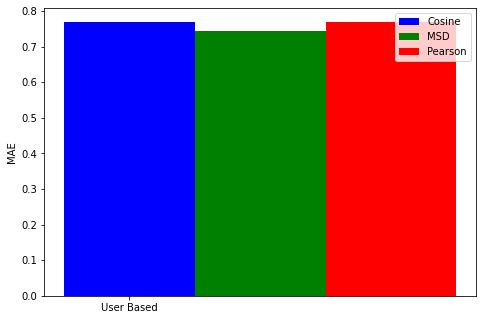

In [ ]:
#MAE for User Based for all similarities
label = ['User Based']
value = np.arange(len(label))  # the label locations

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(value + 0.00, graph_data['mae']['cosine'][0], color = 'b', width = 0.25)
ax.bar(value + 0.25, graph_data['mae']['msd'][0], color = 'g', width = 0.25)
ax.bar(value + 0.50, graph_data['mae']['pearson_baseline'][0], color = 'r', width = 0.25)

plt.xticks(value, label)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

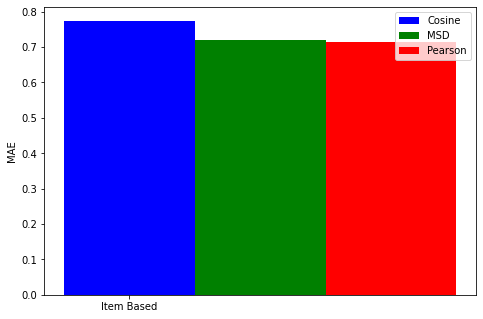

In [ ]:
#MAE for Item Based for all similarities
label = ['Item Based']
value = np.arange(len(label))  # the label locations


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(value + 0.00, graph_data['mae']['cosine'][1], color = 'b', width = 0.25)
ax.bar(value + 0.25, graph_data['mae']['msd'][1], color = 'g', width = 0.25)
ax.bar(value + 0.50, graph_data['mae']['pearson_baseline'][1], color = 'r', width = 0.25)

plt.xticks(value, label)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

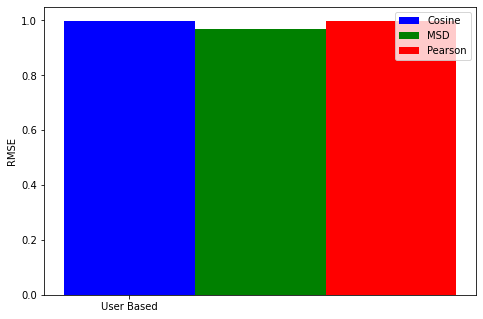

In [ ]:
#RMSE for User Based for all similarities
label = ['User Based']
value = np.arange(len(label)) 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(value + 0.00, graph_data['rmse']['cosine'][0], color = 'b', width = 0.25)
ax.bar(value + 0.25, graph_data['rmse']['msd'][0], color = 'g', width = 0.25)
ax.bar(value + 0.50, graph_data['rmse']['pearson_baseline'][0], color = 'r', width = 0.25)

plt.xticks(value, label)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

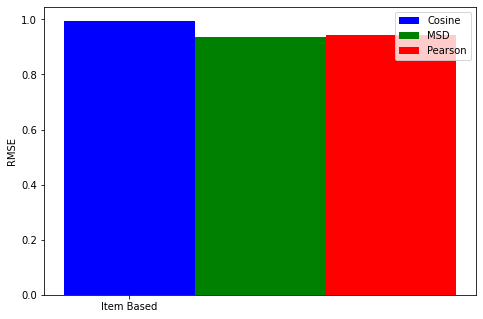

In [ ]:
#RMSE for Item Based for all similarities
label = ['Item Based']
value = np.arange(len(label))  # the label locations

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(value + 0.00, graph_data['rmse']['cosine'][1], color = 'b', width = 0.25)
ax.bar(value + 0.25, graph_data['rmse']['msd'][1], color = 'g', width = 0.25)
ax.bar(value + 0.50, graph_data['rmse']['pearson_baseline'][1], color = 'r', width = 0.25)

plt.xticks(value, label)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

In [ ]:
k_start = 1
mean = 2000
user_based_results = []
measures = ['RMSE', 'MAE']

for i in range(1,100):
    knn_user_based = KNNBasic(sim_options={'user_based': True}, k=i)
    cv_user_based = cross_validate(knn_user_based, ratings_data, measures, verbose=True, cv=5)

    start_mean = cv_user_based['test_rmse'].mean()
    if start_mean < mean:
        mean = start_mean
        k_start = i
    user_based_results.append(start_mean)
    print(i)

print(k_start, mean)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2128  1.2189  1.2155  1.2043  1.2072  1.2117  0.0053  
MAE (testset)     0.9030  0.9085  0.9065  0.8960  0.8986  0.9025  0.0047  
Fit time          0.16    0.18    0.18    0.20    0.18    0.18    0.01    
Test time         1.09    0.88    1.32    0.92    0.86    1.01    0.17    
1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

In [37]:
k_start = 1
mean = 2000
item_based_results = []
measures = ['RMSE', 'MAE']

for i in range(1,100):
    knn_item_based = KNNBasic(sim_options={'user_based': False}, k=i)
    cv_item_based = cross_validate(knn_item_based, ratings_data, measures, verbose=True, cv=5)

    start_mean = cv_item_based['test_rmse'].mean()
    if start_mean < mean:
        mean = start_mean
        k_start = i
    item_based_results.append(start_mean)
    print(i)
print(k_start, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3022  1.3019  1.3048  1.3122  1.2957  1.3034  0.0053  
MAE (testset)     0.9679  0.9616  0.9661  0.9723  0.9613  0.9658  0.0041  
Fit time          9.58    6.29    8.71    6.20    6.83    7.52    1.37    
Test time         7.18    7.29    6.14    7.00    5.33    6.59    0.75    
1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

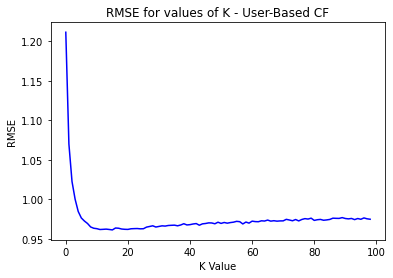

In [38]:
plt.plot(user_based_results, color = 'blue')
plt.xlabel("K Value")
plt.ylabel("RMSE")
plt.title("RMSE for values of K - User-Based CF")
plt.show()

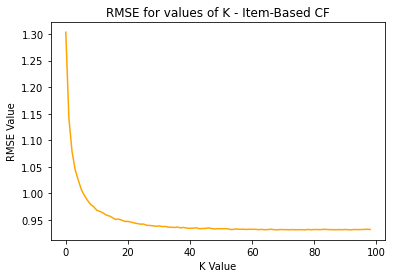

In [39]:
plt.plot(item_based_results, color = 'orange')
plt.xlabel("K Value")
plt.ylabel("RMSE Value")
plt.title("RMSE for values of K - Item-Based CF")
plt.show()

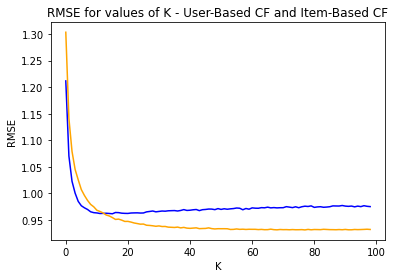

In [40]:
plt.plot(user_based_results, color = 'blue')
plt.plot(item_based_results, color='orange')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for values of K - User-Based CF and Item-Based CF")
plt.show()

In [41]:
#min value of k for user-based 
min_k_ub = min(user_based_results)
index_min_ub = user_based_results.index(min_k_ub)
print('Value of K with min RMSE for User-Based',index_min_ub)

Value of K with min RMSE for User-Based 15


In [42]:
#min value of k for user-based 
min_k_ib = min(item_based_results)
index_min_ib = item_based_results.index(min_k_ib)
print('Value of K with min RMSE for Item-Based',index_min_ib)

Value of K with min RMSE for Item-Based 77
